# Problem Statement

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A renowned credit rating organization wants to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, the organization aims to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, the organization foresees facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.

2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

As a part of the data science team in the organization, you have been provided with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will default on its debt repayments in the next two quarters. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

## Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is available in the data dictionary file (*FRA_DataDictionary.xlsx*).

# **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_excel("C:/Users/mechs/OneDrive/Desktop/FRA/CompData.xlsx")  ##  Fill the blank to read the data
df.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

# Data Overview

In [5]:
df.head() ##  Complete the code to view top 5 rows of the data

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

In [6]:
df.tail() ##  Complete the code to view last 5 rows of the data

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.             3.021580e-04   
2054    21216    Firstobj.Tech.             1.371450e-04   
2055      142  Diamines & Chem.             2.114990e-04   
2056    18014       IL&FS Engg.             3.750000e+09   
2057    43229      Channel Nine             2.981110e-04   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                            6.490000e+09         0.477066   
2054                            0.000000e+00         0.465211   
2055                            8.370000e+09         0.480248   
2056                            0.000000e+00         0.474670   
2057                            0.000000e+00         0.467203   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                              0.000000     0.183014              0.322063   
2054                              0.000658     0.000000              0.319764   
2055                              0.000502     0.000000              0.327828   
2056                              0.000578     0.306205              0.322027   
2057                              0.000826     0.000000              0.330021   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                0.192739   
2054                                0.169391   
2055                                0.155005   
2056                                0.173834   
2057                                0.180236   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                  0.022127  ...              0.320387   
2054                                  0.022072  ...              0.312324   
2055                                  0.021861  ...              0.313122   
2056                                  0.022167  ...              0.315632   
2057                                  0.022418  ...              0.316734   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                              0.004430                       0   
2054                              0.032284                       0   
2055                              0.040998                       0   
2056                              0.020275                       0   
2057                              0.031368                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                    0.000420             0.624567   
2054                    0.000882             0.624008   
2055                    0.009579             0.623718   
2056                    0.004958             0.623443   
2057                    0.000186             0.623588   

      _Degree_of_Financial_Leverage_DFL  \
2053                           0.026791   
2054                           0.024201   
2055                           0.026702   
2056                           0.026943   
2057                           0.026871   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                           0.565158                 1   
2054                                           0.573670                 1   
2055                                           0.564697                 1   
2056                                           0.565792                 1   
2057                                           0.565512                 1   

      _Equity_to_Liability  Default  
2053              0.171662        0  
2054              0.053740        0  
2055              0.054984        0  
2056              0.057553        0  
2057              0.020266        0  

[5 rows x 58 columns]

In [7]:
df.shape ##  Complete the code to view dimensions of the data

(2058, 58)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [9]:
# Remove '_' (startswith) from column headers where present
for col in df.columns:
    if col.startswith('_'):
        df.rename(columns={col: col[1:]}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [11]:
# checking for duplicate values
df.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

In [12]:
#checking for no. of unique values
df.nunique().sum ##  Complete the code to check unique entries in the data

<bound method NDFrame._add_numeric_operations.<locals>.sum of Co_Code                                             2058
Co_Name                                             2058
Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio             

In [13]:
df.describe().T

count          mean  \
Co_Code                                           2058.0  1.757211e+04   
Operating_Expense_Rate                            2058.0  2.052389e+09   
Research_and_development_expense_rate             2058.0  1.208634e+09   
Cash_flow_rate                                    2058.0  4.652426e-01   
Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
Tax_rate_A                                        2058.0  1.147770e-01   
Cash_Flow_Per_Share                               1891.0  3.199856e-01   
Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
Net_Value_Growth_Rate                             2058.0  5.189504e+06   
Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
Cash_Reinvestment_perc                            2058.0  3.771970e-01   
Current_Ratio                                     2058.0  1.336249e+06   
Quick_Ratio                                       2058.0  2.775510e+07   
Interest_Expense_Ratio                            2058.0  6.312913e-01   
Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
Total_Asset_Turnover                              2058.0  1.286405e-01   
Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
Average_Collection_Days                           2058.0  2.629786e+07   
Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
Operating_profit_per_person                       2058.0  4.036693e-01   
Allocation_rate_per_person                        2058.0  5.725559e+06   
Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
Cash_to_Total_Assets                              1962.0  7.993675e-02   
Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
Cash_to_Current_Liability                         2058.0  9.282507e+07   
Operating_Funds_to_Liability                      2058.0  3.482338e-01   
Inventory_to_Working_Capital                      2058.0  2.777491e-01   
Inventory_to_Current_Liability                    2058.0  5.786346e+07   
Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
Total_income_to_Total_expense                     2058.0  2.357977e-03   
Total_expense_to_Assets                           2058.0  3.109208e-02   
Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
Cash_Turnover_Rate                                2058.0  2.653696e+09   
Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
Cash_Flow_to_Liability                            2058.0  4.599747e-01   
CFO_to_Assets                                     2058.0  5.797344e-01   
Cash_Flow_to_Equity                               2058.0  3.146292e-01   
Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
Liability_Assets_Flag                             2058.0  3.401361e-03   
Total_assets_to_GNP_price                         2058.0  2.779397e+07   
No_credit_Interval                                2058.0  6.236856e-01   
Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.

* We can see that `Co_Code` and `Co_Name` are not relevant for this exercise
* So we will drop these variables

In [14]:
df.drop(['Co_Code', 'Co_Name'], axis = 1, inplace = True)

#Exploratory Data Analysis

## Univariate Analysis

In [15]:
df["Default"].nunique()   ## Complete the code to check unique values in the mentioned column

2

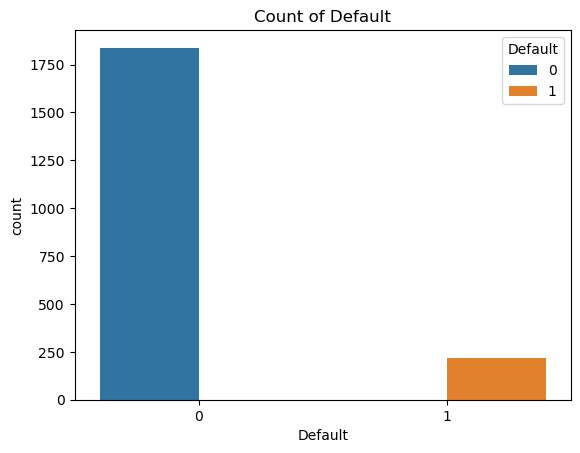

In [16]:
#Plotting a countplot for the target variable
sns.countplot(x = "Default", data = df, hue = 'Default')   ## Complete the code to get a countplot of the mentionedd column.
plt.title('Count of Default')
plt.show()

In [17]:
#Percentage of defaulters
(df.Default.sum()/len(df)) * 100

10.689990281827017

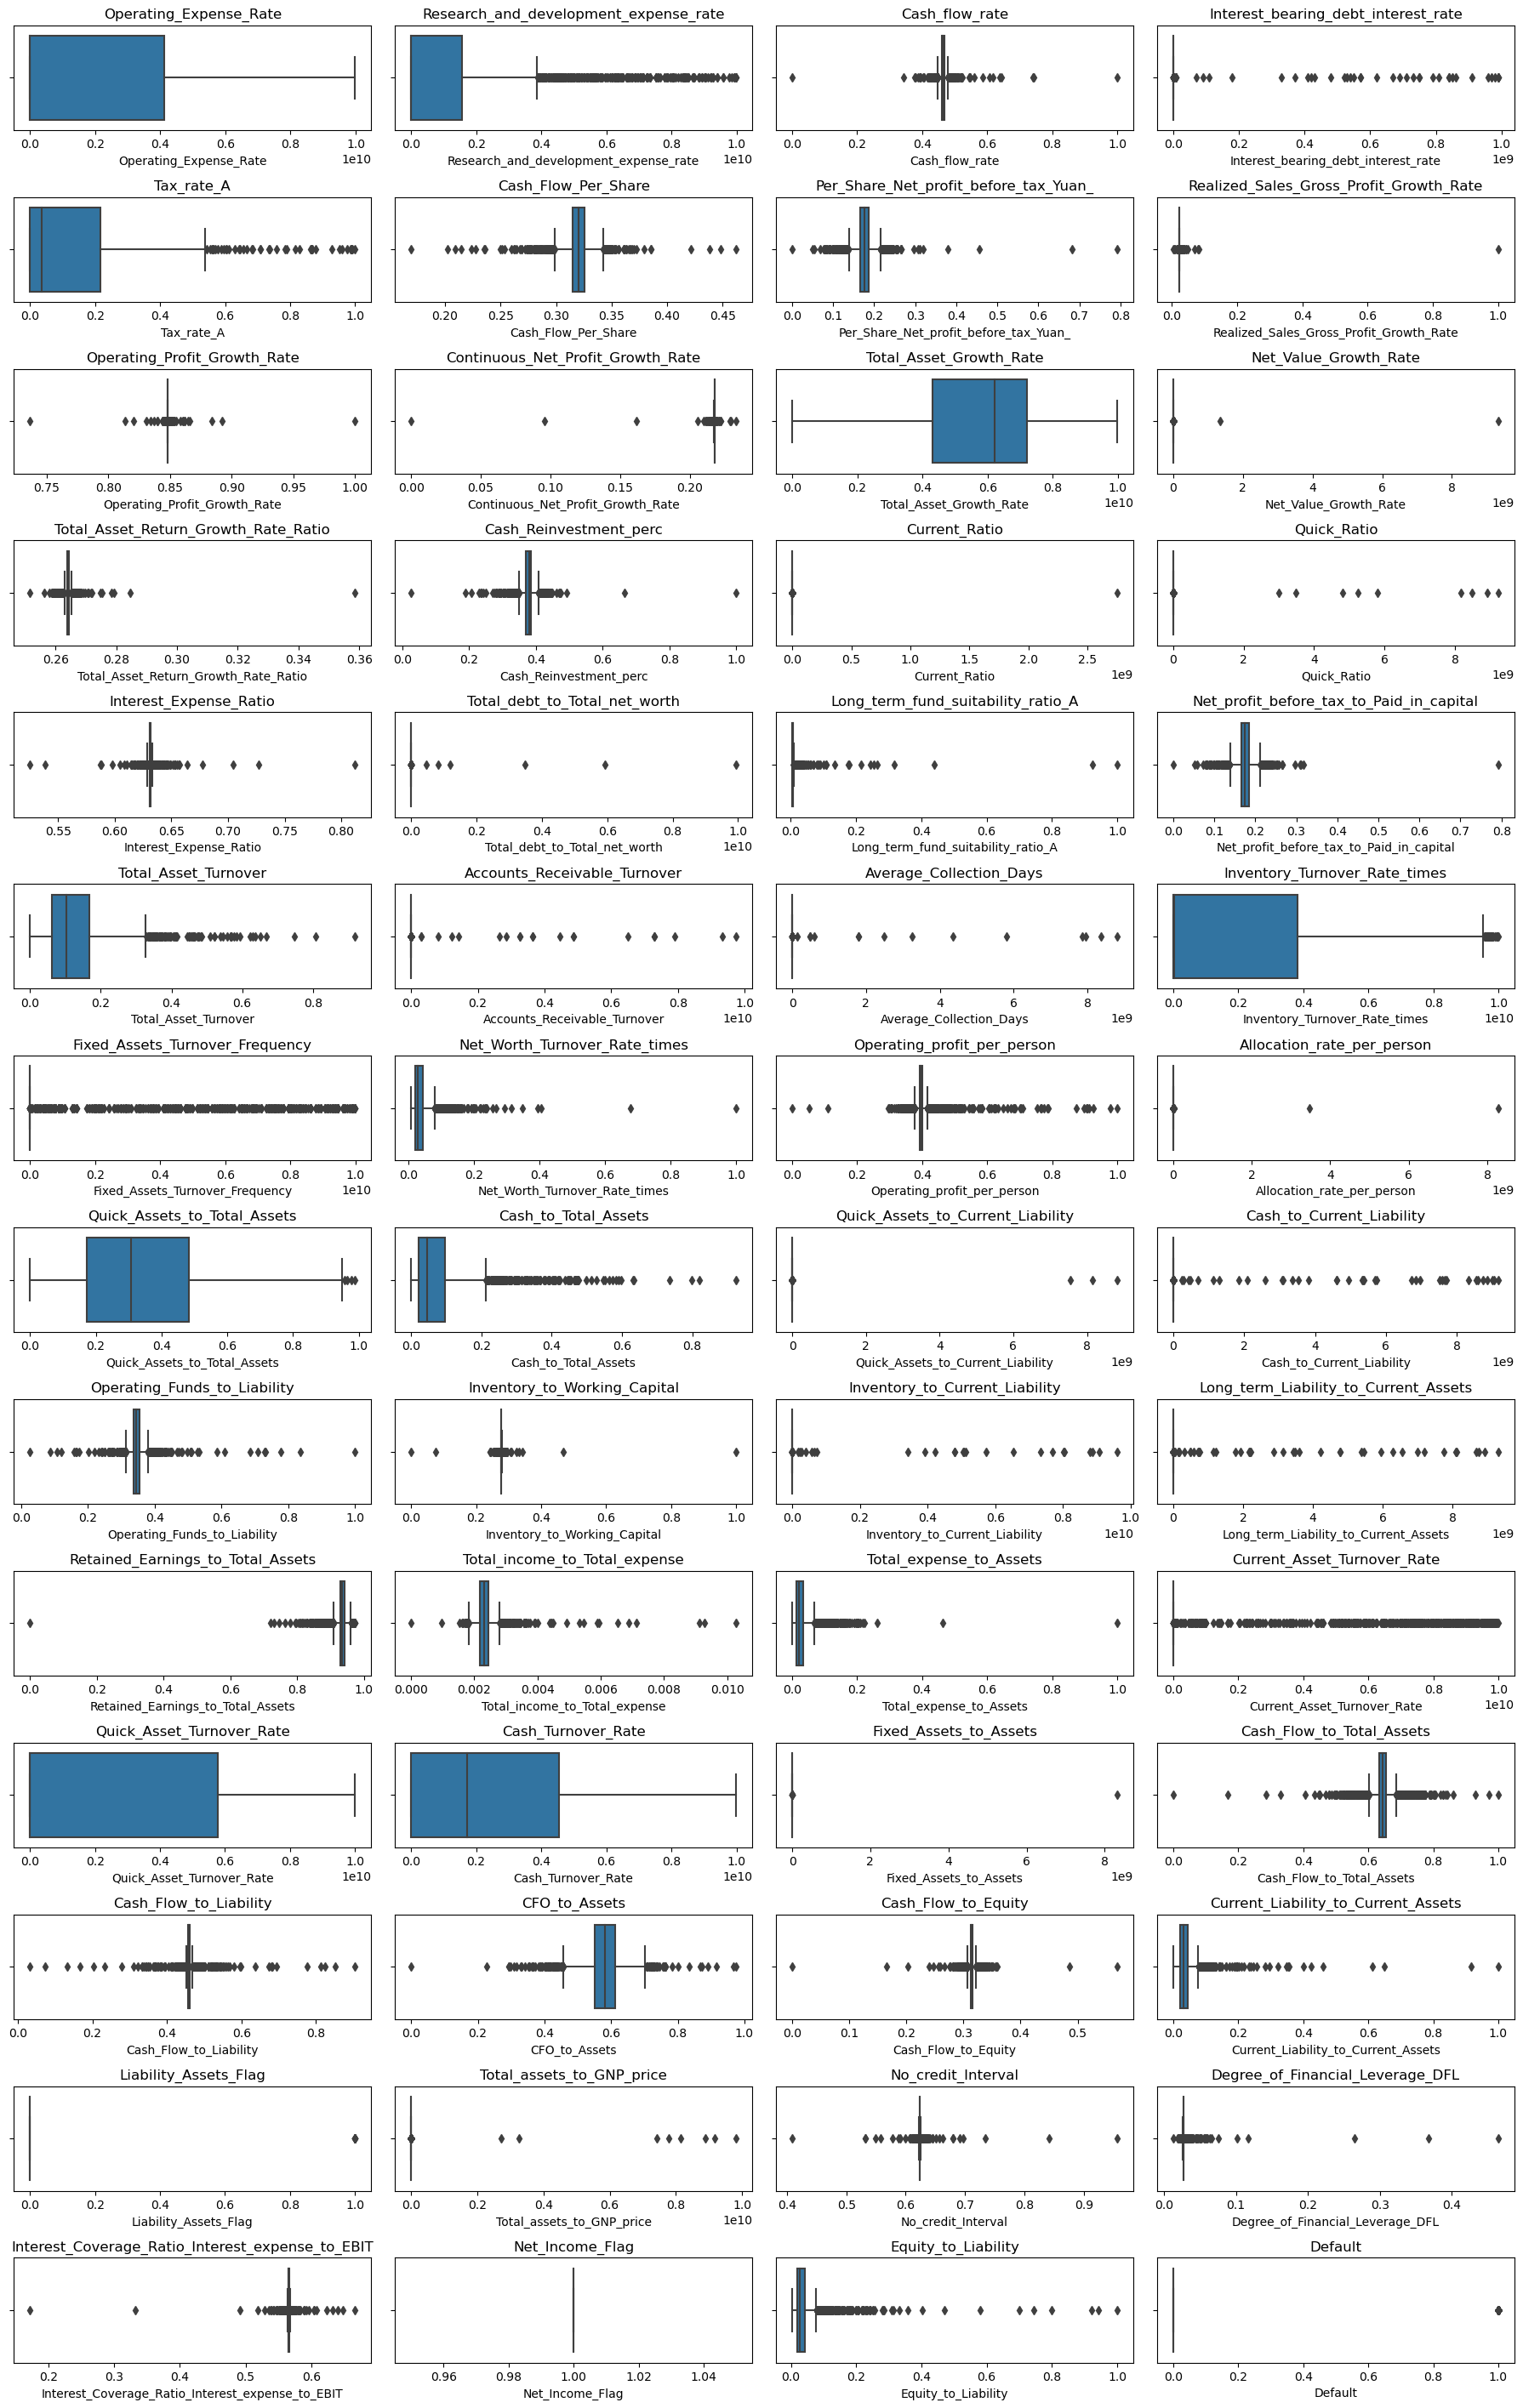

In [18]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)  ## Complete the code to get boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)


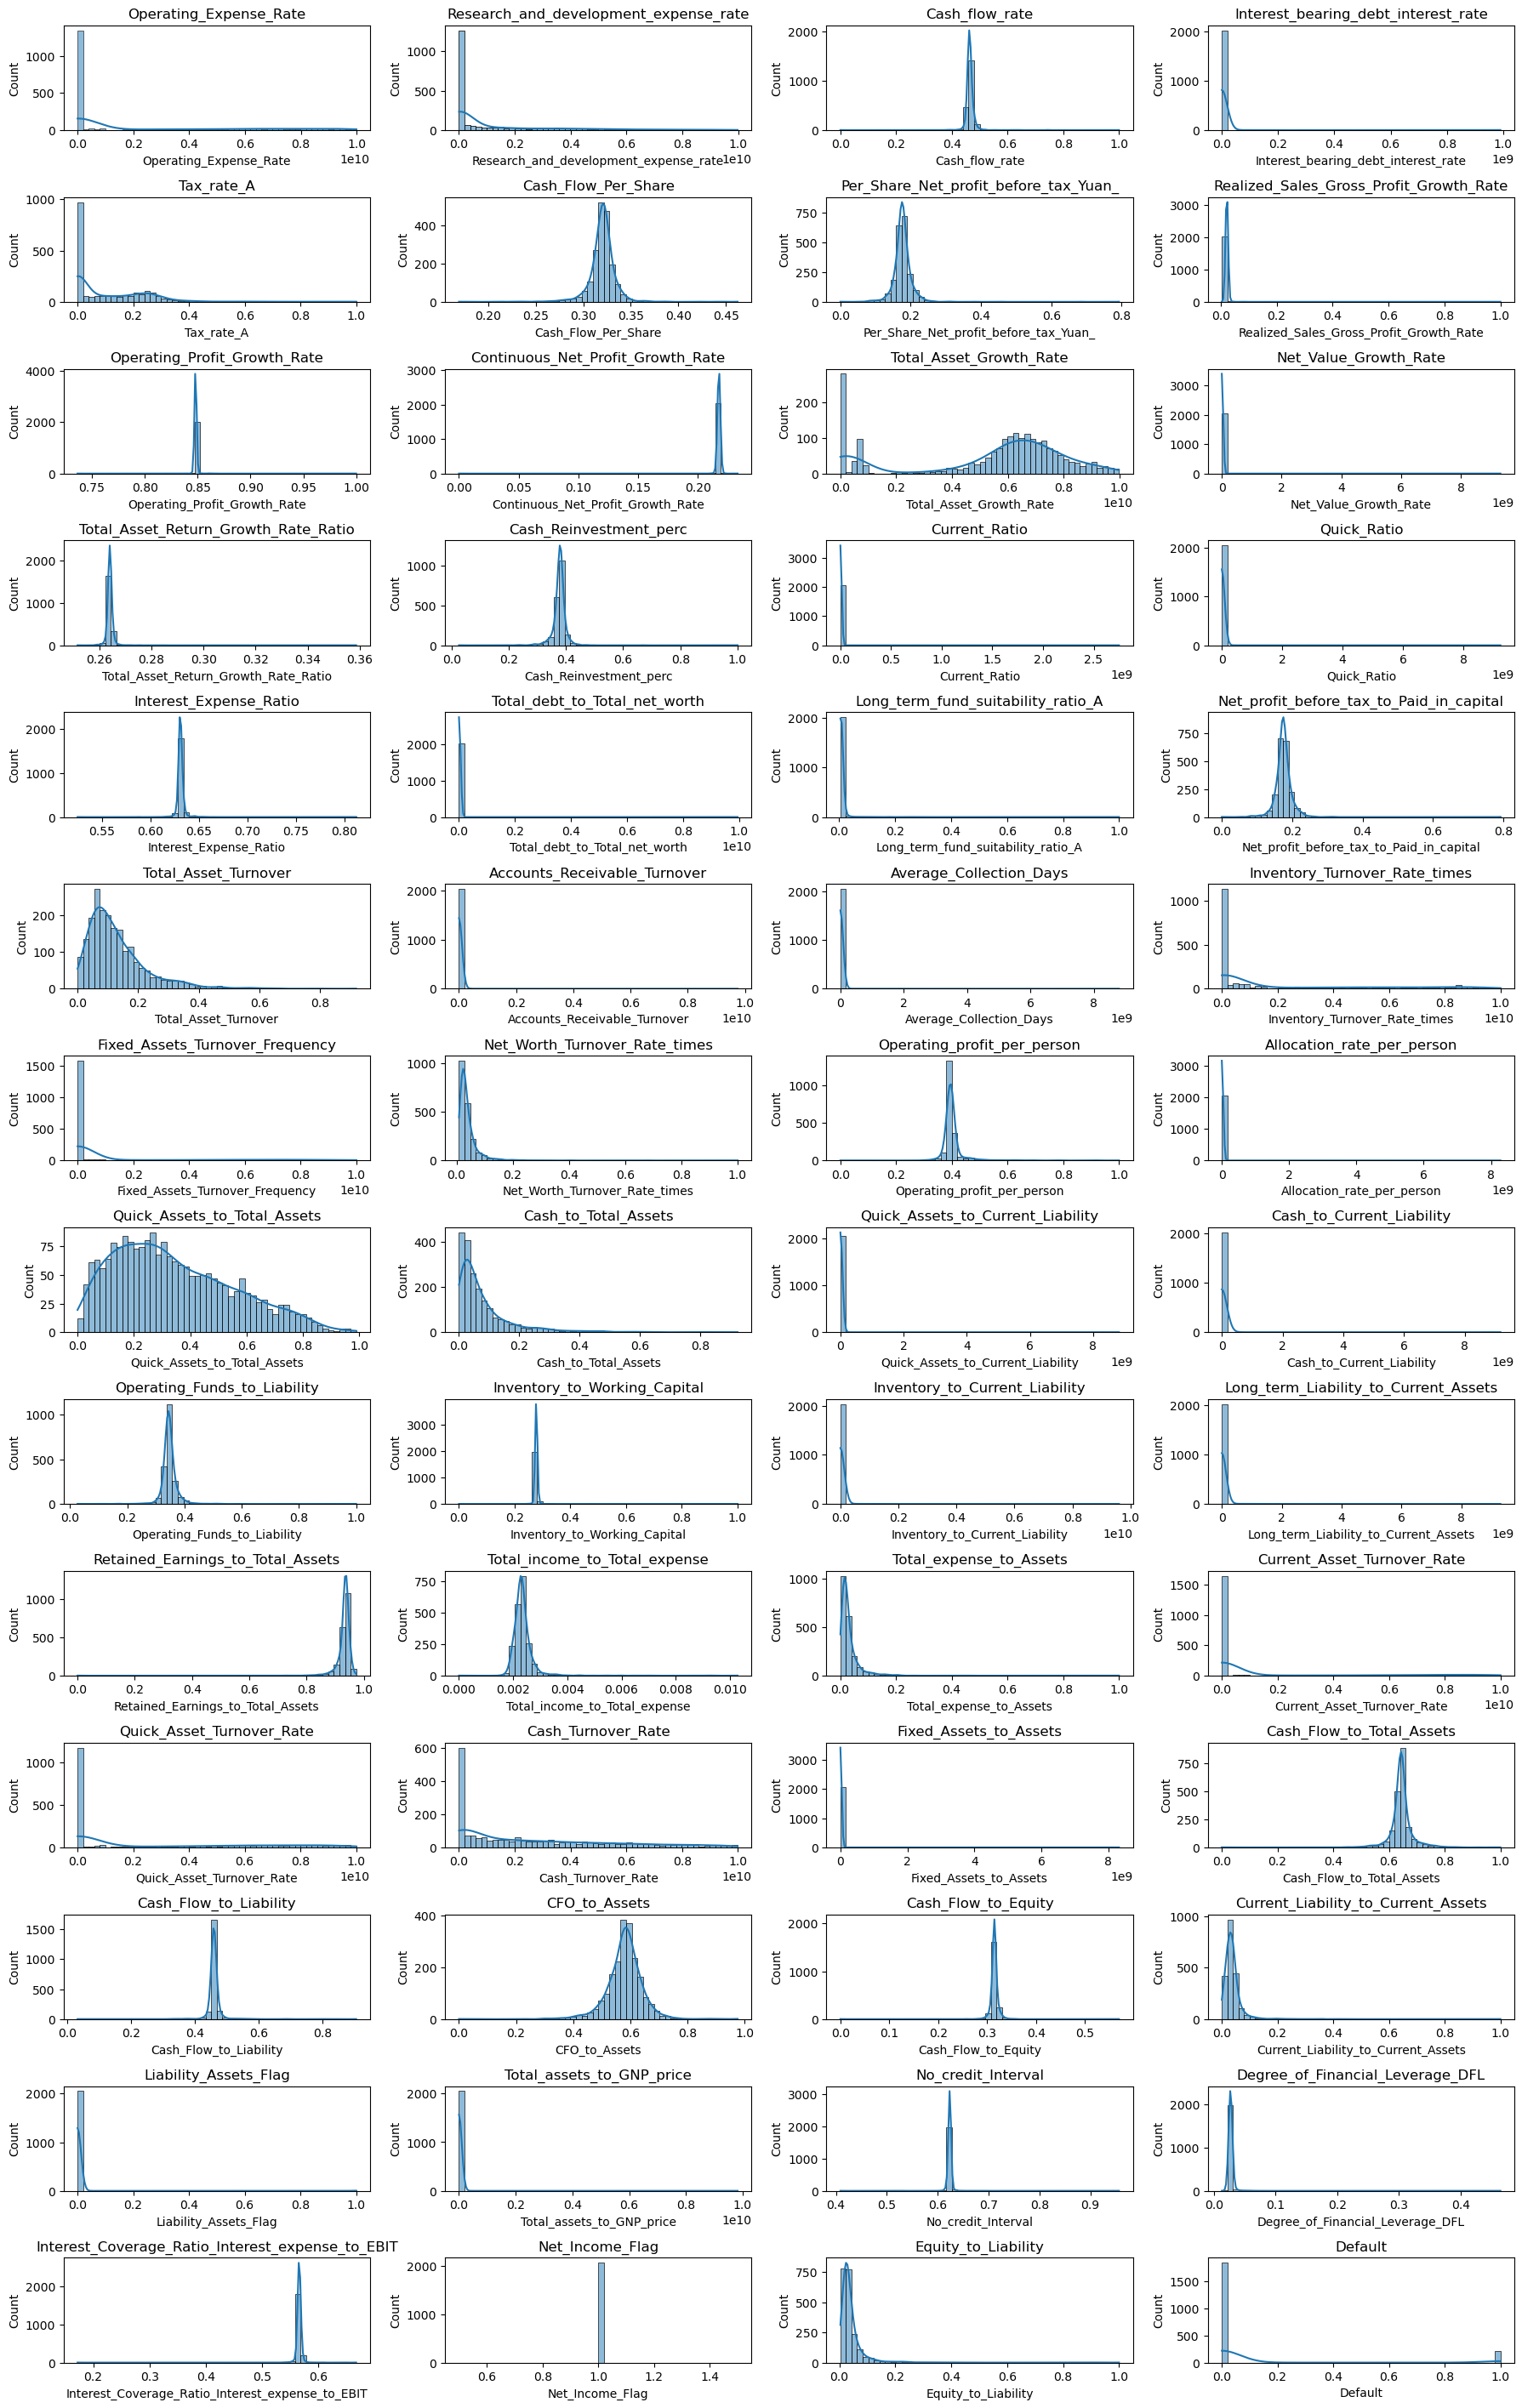

In [19]:
#Get distplot for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.histplot(data=df, x=variable, kde=True, bins=50)  ## Complete the code to get histplot for all numerical columns in the data
    plt.tight_layout()
    plt.title(variable)


## Bivariate Analysis

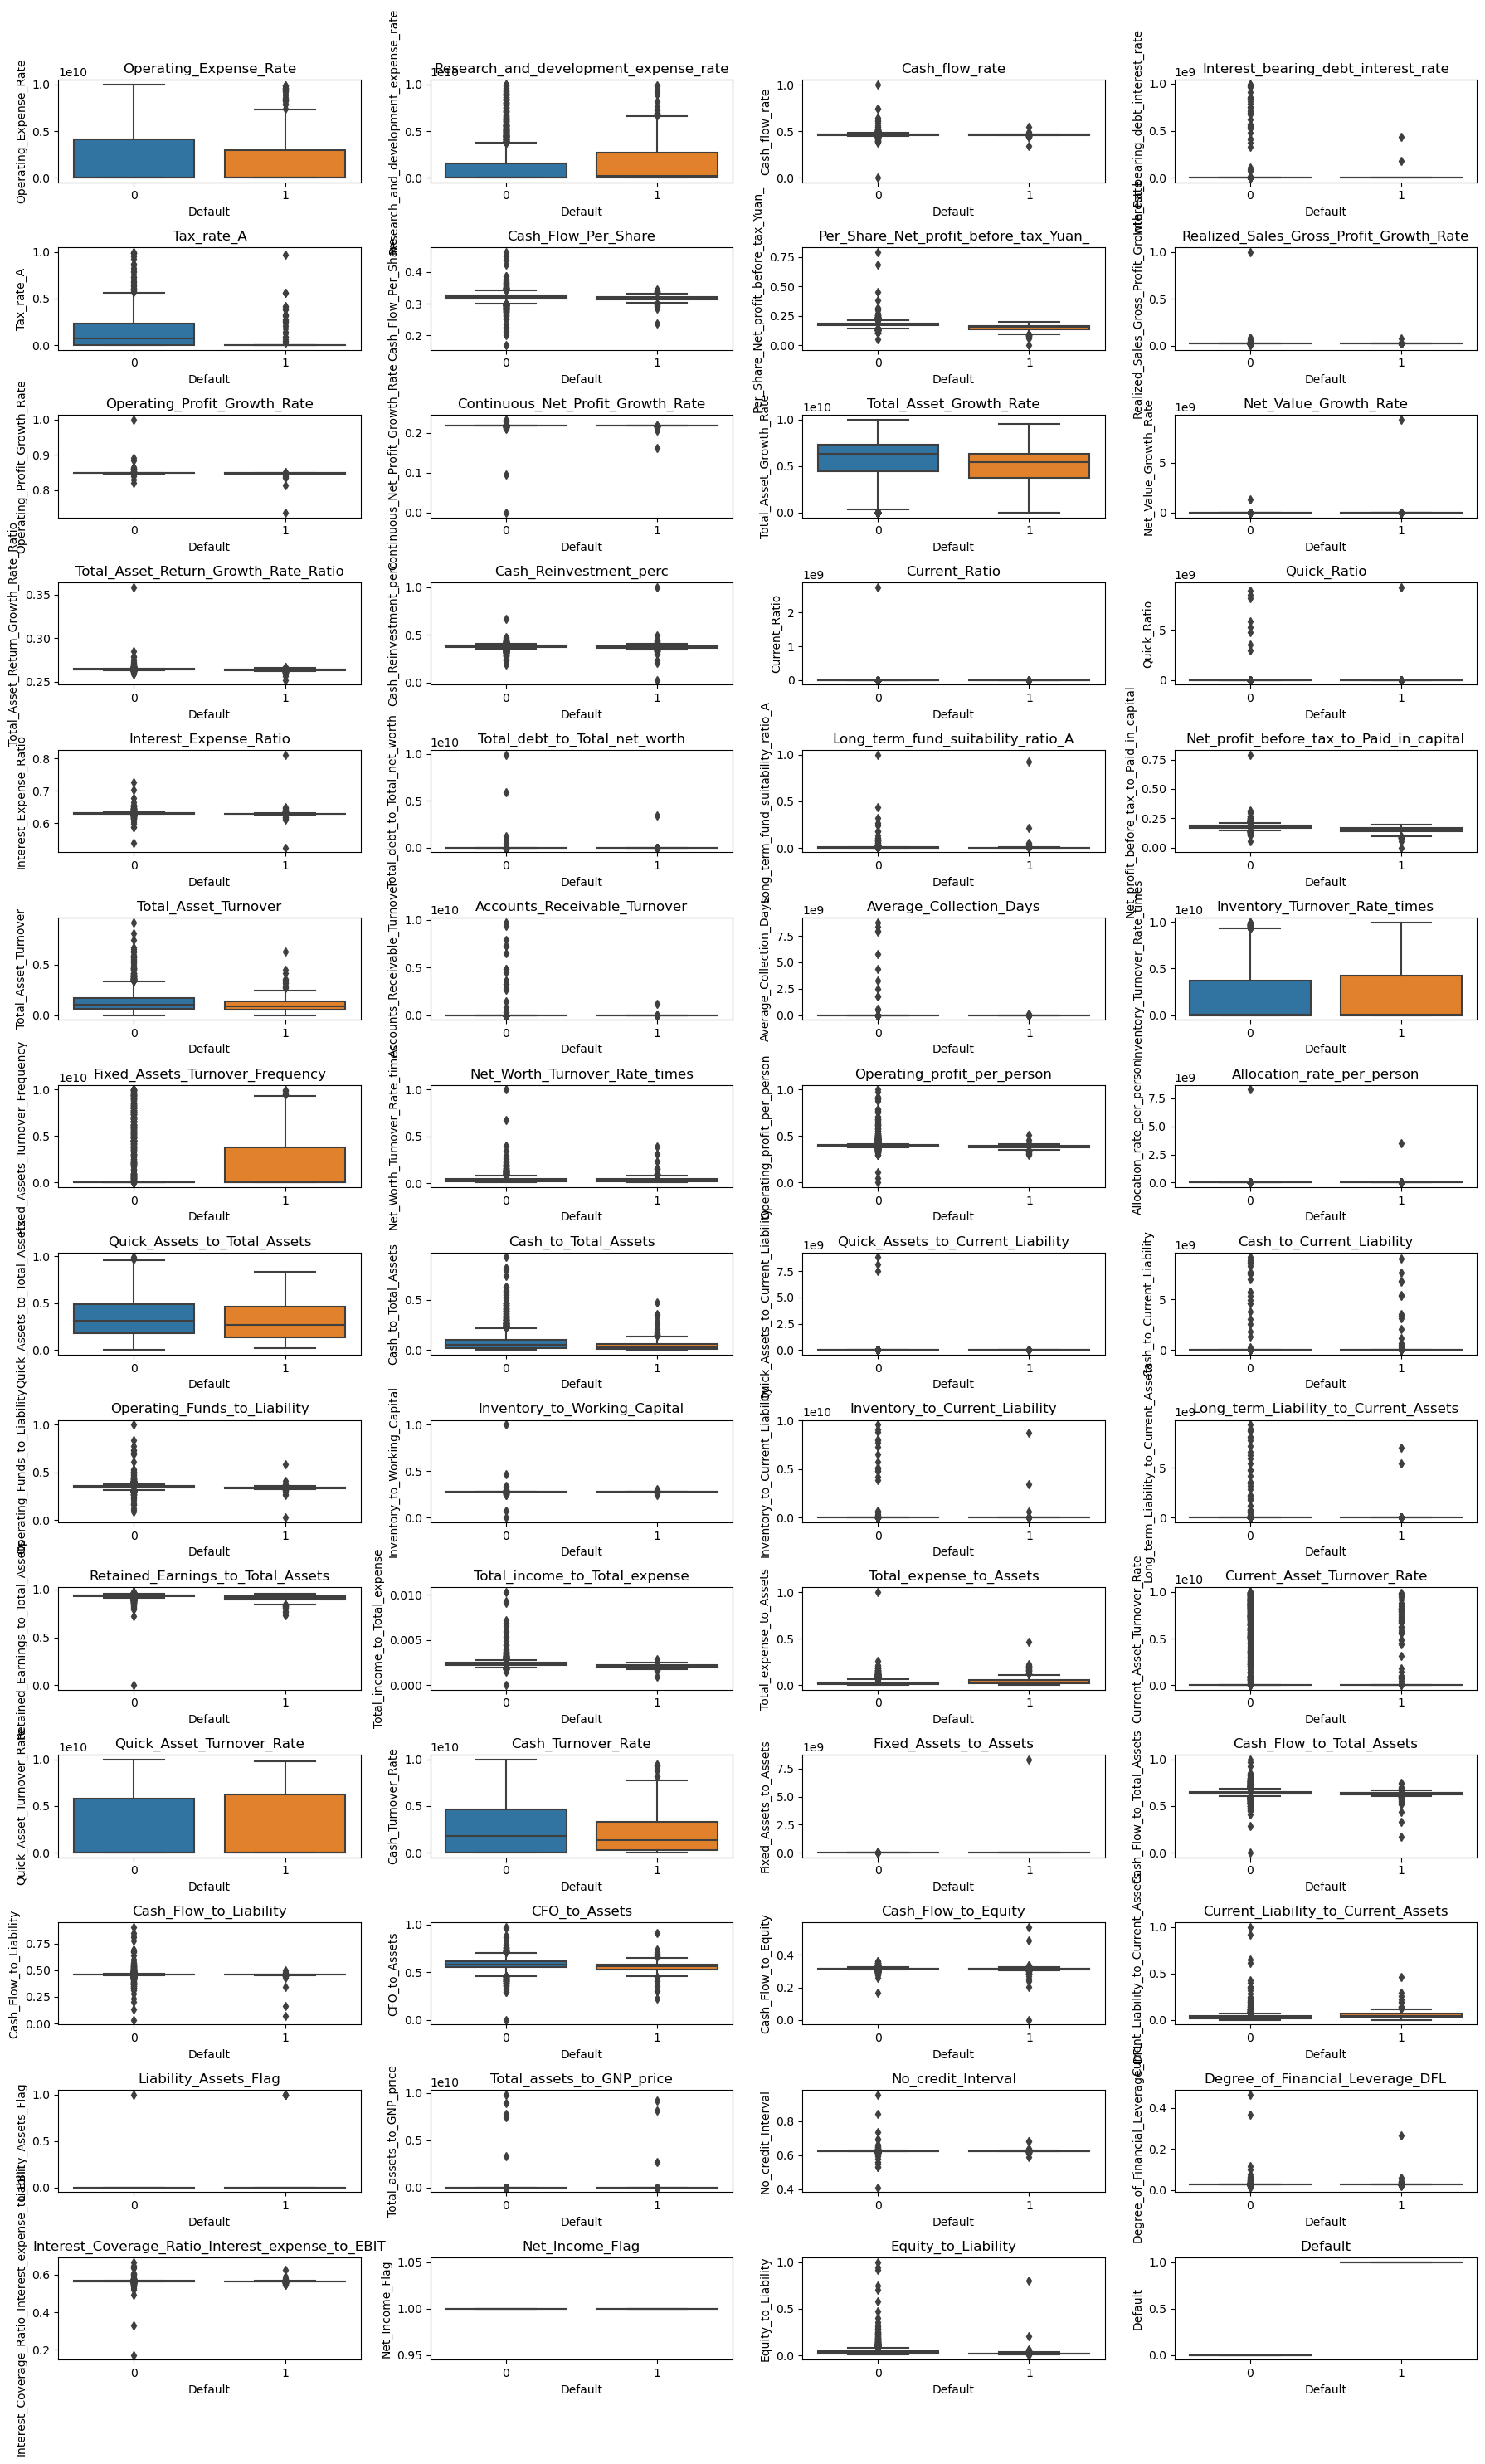

In [20]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, y=variable, x='Default')  ## Complete the code to get boxplot of all variables with Default column in the data
    plt.tight_layout()
    plt.title(variable)


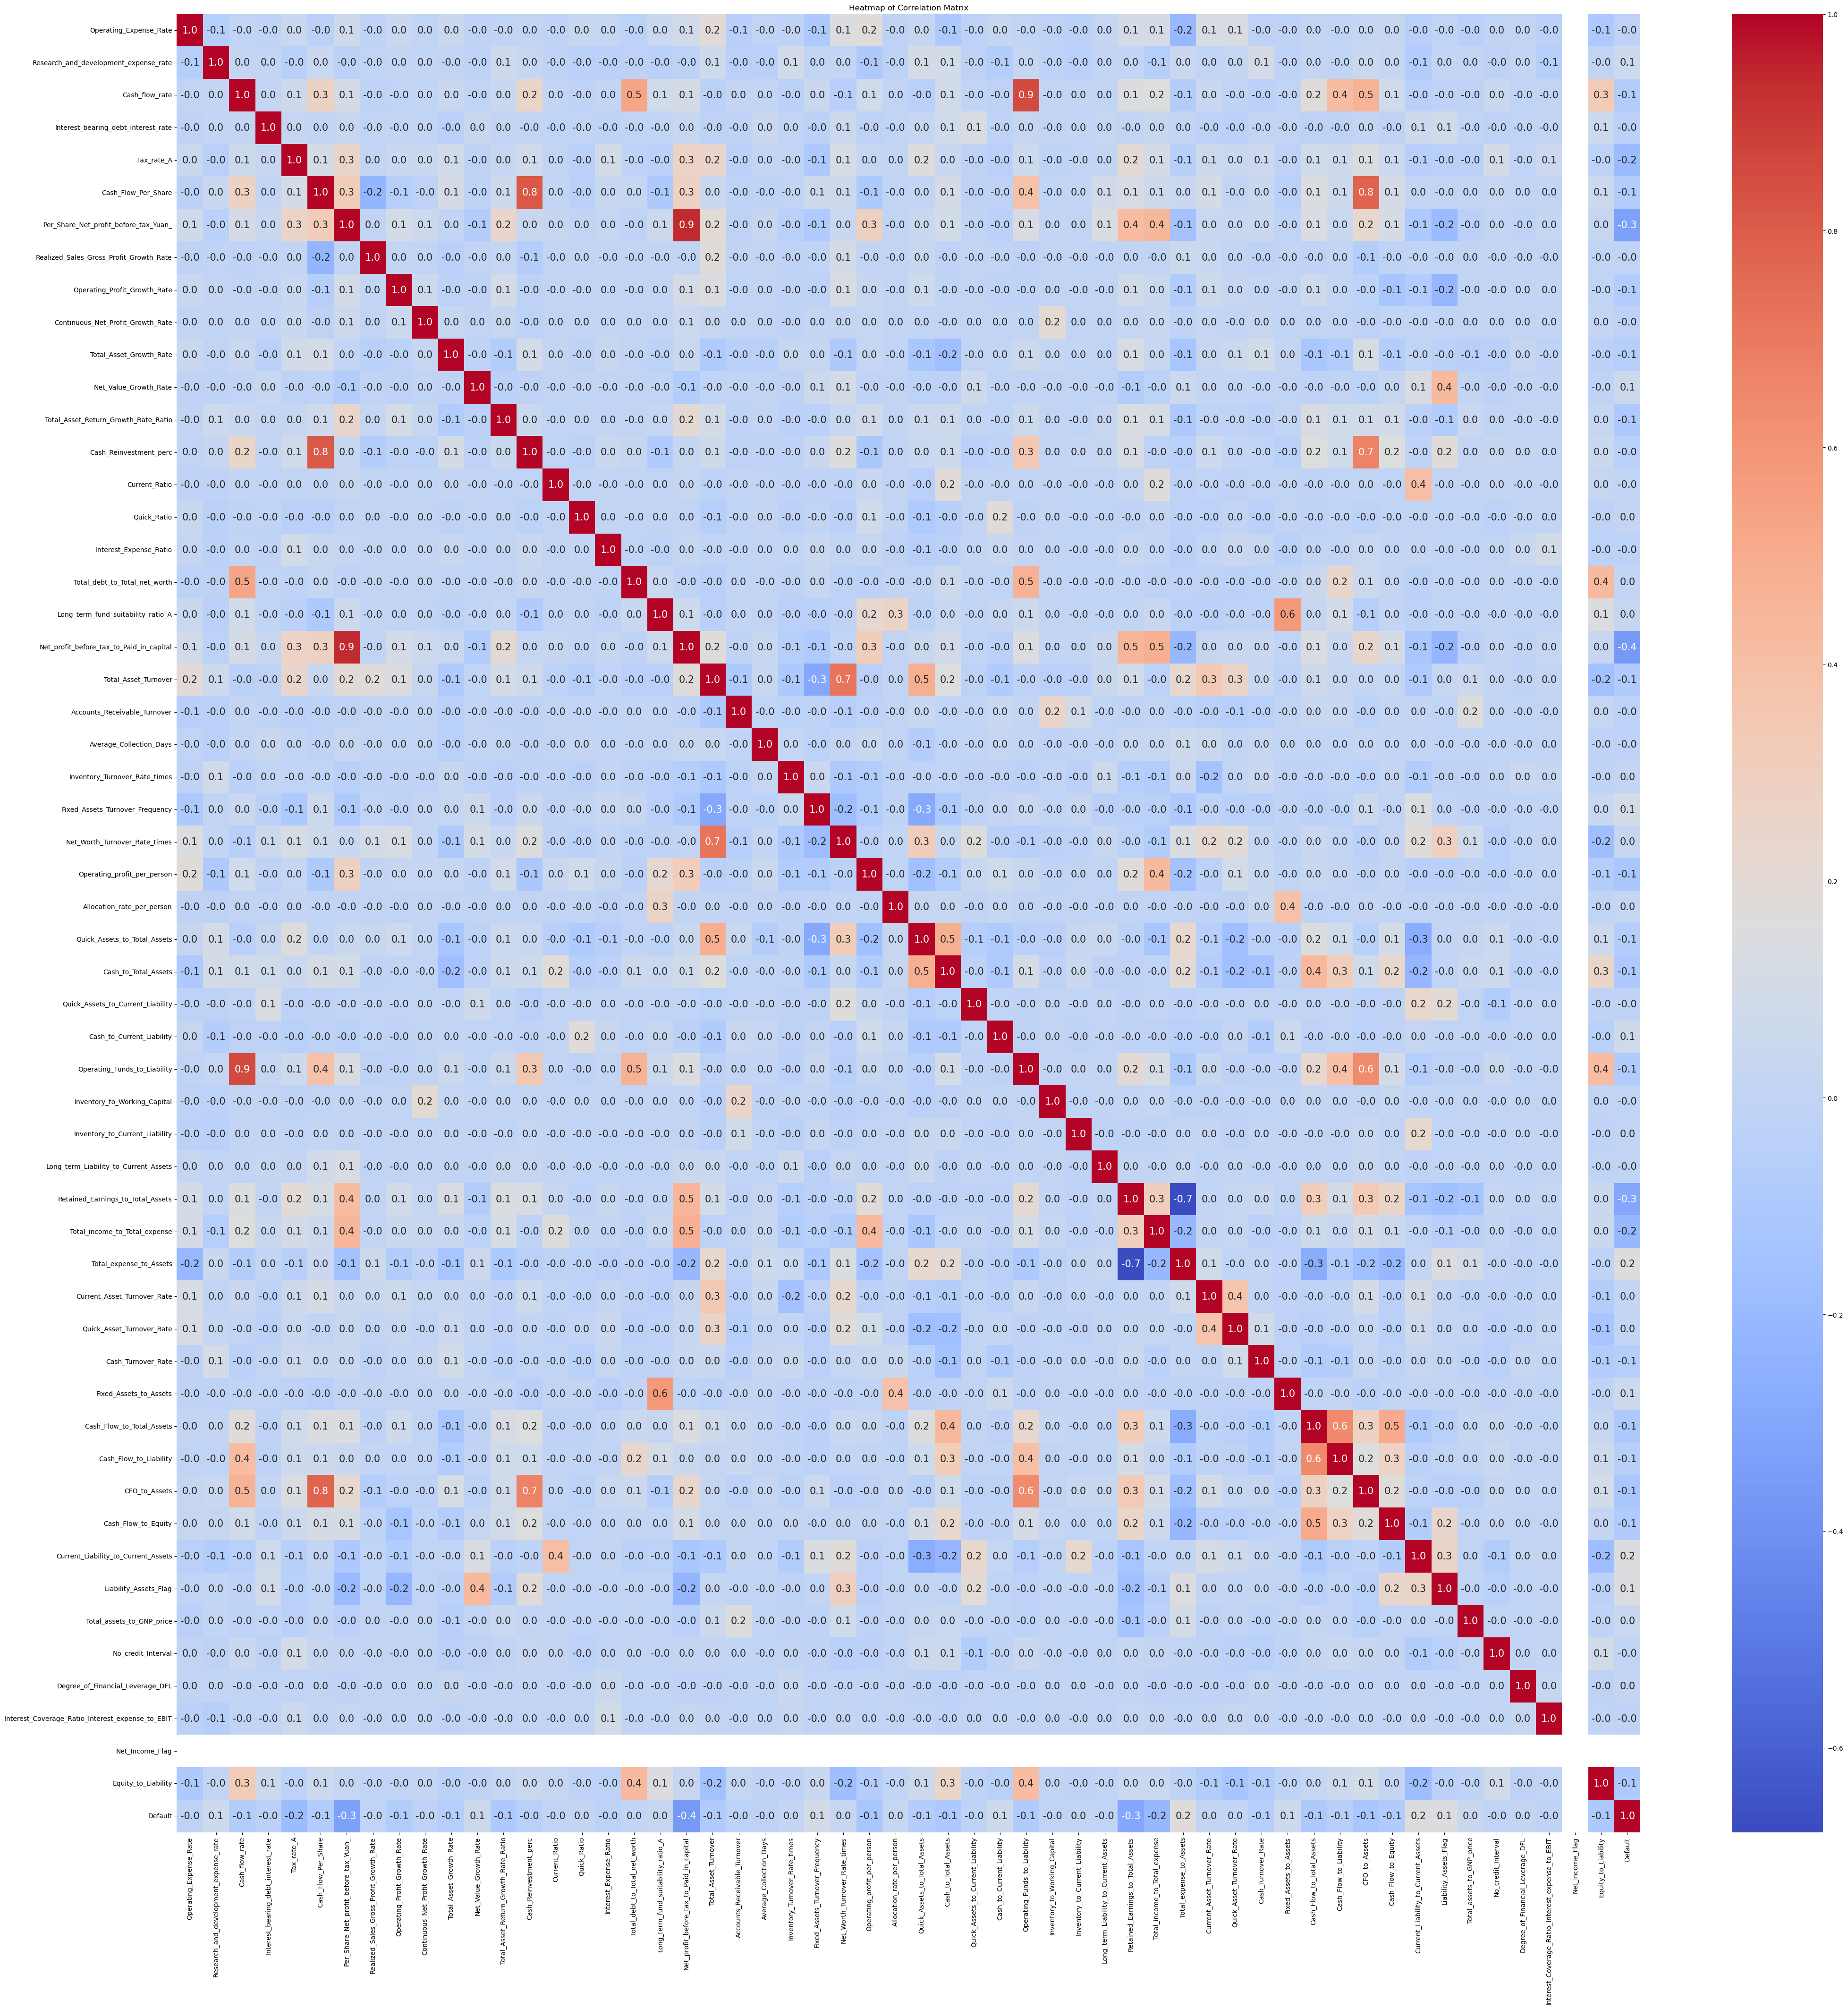

In [21]:
# Calculate the correlation matrix
corr_matrix = df.corr()  ## Complete the code to get the correlation matrix for the data

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Data Preprocessing

## Dropping columns with few unique values

In [22]:
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

We can drop the columns `Net_Income_Flag` and `Liability_Assets_Flag` as they have very few unique values.

In [23]:
df.drop(['Net_Income_Flag', 'Liability_Assets_Flag'], axis = 1, inplace = True)  ## Complete the code to drop the mentioned columns from the dataset
df.nunique()

Operating_Expense_Rate                              1495
Research_and_development_expense_rate                629
Cash_flow_rate                                      1888
Interest_bearing_debt_interest_rate                  813
Tax_rate_A                                           985
Cash_Flow_Per_Share                                  900
Per_Share_Net_profit_before_tax_Yuan_                876
Realized_Sales_Gross_Profit_Growth_Rate             1939
Operating_Profit_Growth_Rate                        2015
Continuous_Net_Profit_Growth_Rate                   2014
Total_Asset_Growth_Rate                              922
Net_Value_Growth_Rate                               1757
Total_Asset_Return_Growth_Rate_Ratio                1428
Cash_Reinvestment_perc                              1690
Current_Ratio                                       1972
Quick_Ratio                                         1970
Interest_Expense_Ratio                              1716
Total_debt_to_Total_net_worth  

## Outliers Check

In [24]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  ## Fill the blank with correct value for getting lower_bound
    upper_bound = Q3 + 1.5 * IQR  ## Fill the blank with correct value for getting upper_bound

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


Column  No. of outliers
0                             Operating_Expense_Rate                0
1              Research_and_development_expense_rate              264
2                                     Cash_flow_rate              206
3                Interest_bearing_debt_interest_rate               94
4                                         Tax_rate_A               42
5                                Cash_Flow_Per_Share              146
6              Per_Share_Net_profit_before_tax_Yuan_              186
7            Realized_Sales_Gross_Profit_Growth_Rate              283
8                       Operating_Profit_Growth_Rate              317
9                  Continuous_Net_Profit_Growth_Rate              340
10                           Total_Asset_Growth_Rate                0
11                             Net_Value_Growth_Rate              304
12              Total_Asset_Return_Growth_Rate_Ratio              226
13                            Cash_Reinvestment_perc              220
14                                     Current_Ratio              193
15                                       Quick_Ratio              190
16                            Interest_Expense_Ratio              328
17                     Total_debt_to_Total_net_worth              105
18                Long_term_fund_suitability_ratio_A              234
19          Net_profit_before_tax_to_Paid_in_capital              173
20                              Total_Asset_Turnover              101
21                      Accounts_Receivable_Turnover              281
22                           Average_Collection_Days               77
23                     Inventory_Turnover_Rate_times               29
24                   Fixed_Assets_Turnover_Frequency              501
25                     Net_Worth_Turnover_Rate_times              165
26                       Operating_profit_per_person              357
27                        Allocation_rate_per_person              200
28                      Quick_Assets_to_Total_Assets                4
29                              Cash_to_Total_Assets              163
30                 Quick_Assets_to_Current_Liability              185
31                         Cash_to_Current_Liability              253
32                      Operating_Funds_to_Liability              219
33                      Inventory_to_Working_Capital              247
34                    Inventory_to_Current_Liability              129
35             Long_term_Liability_to_Current_Assets              213
36                 Retained_Earnings_to_Total_Assets              208
37                     Total_income_to_Total_expense              136
38                           Total_expense_to_Assets              168
39                       Current_Asset_Turnover_Rate              464
40                         Quick_Asset_Turnover_Rate                0
41                                Cash_Turnover_Rate                0
42                            Fixed_Assets_to_Assets               10
43                         Cash_Flow_to_Total_Assets              317
44                            Cash_Flow_to_Liability              407
45                                     CFO_to_Assets              110
46                               Cash_Flow_to_Equity              306
47               Current_Liability_to_Current_Assets              121
48                         Total_assets_to_GNP_price              235
49                                No_credit_Interval              396
50                  Degree_of_Financial_Leverage_DFL              438
51  Interest_Coverage_Ratio_Interest_expense_to_EBIT              376
52                               Equity_to_Liability              190
53                                           Default              220

## Data Preparation for Modeling

In [25]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Default'], axis = 1)
df_y = df['Default']

In [26]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42, stratify = df_y)  ## Complete the code to split the data into train and test in the ratio 75:25

## Missing Values Detection and Treatment

In [27]:
# Check missing values
X_train.isnull().sum()  ## Complete the code to get the number of null or NaN values in each column

Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 126
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                           0
Interest_Expense_Ratio                                0
Total_debt_to_Total_net_worth                   

In [28]:
# Check missing values
X_test.isnull().sum()

Operating_Expense_Rate                               0
Research_and_development_expense_rate                0
Cash_flow_rate                                       0
Interest_bearing_debt_interest_rate                  0
Tax_rate_A                                           0
Cash_Flow_Per_Share                                 41
Per_Share_Net_profit_before_tax_Yuan_                0
Realized_Sales_Gross_Profit_Growth_Rate              0
Operating_Profit_Growth_Rate                         0
Continuous_Net_Profit_Growth_Rate                    0
Total_Asset_Growth_Rate                              0
Net_Value_Growth_Rate                                0
Total_Asset_Return_Growth_Rate_Ratio                 0
Cash_Reinvestment_perc                               0
Current_Ratio                                        0
Quick_Ratio                                          0
Interest_Expense_Ratio                               0
Total_debt_to_Total_net_worth                        3
Long_term_

In [29]:
#Replace the missing values in the data using KNN Imputer
KNNimputerModel = KNNImputer(n_neighbors=5)  ## Complete the code to select 5 neighbors for KNN Imputer

X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.fit_transform(X_test), columns = X_test.columns)  ## Complete the code to replace missing values in X_test

In [30]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


## Scaling the Data

In [31]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)  ## Complete the code to scale X_test to the same scale as X_train

In [32]:
X_train_scaled.head()

Operating_Expense_Rate  Research_and_development_expense_rate  \
0               -0.633296                              -0.396806   
1               -0.633296                              -0.561672   
2               -0.633296                               0.361946   
3               -0.633296                              -0.561672   
4               -0.633296                              -0.561672   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0       -0.132455                            -0.128462   -0.754347   
1       -0.934352                            -0.128462   -0.754347   
2       -0.290335                            -0.128462    0.061964   
3       -0.179548                            -0.128462   -0.754347   
4       -0.123892                            -0.128462   -0.754347   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.088170                              -0.902611   
1            -1.224514                              -1.111709   
2            -0.409659                               0.227000   
3            -0.077773                              -0.482011   
4            -0.168422                              -0.768019   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
0                                -0.156311                     -0.129315   
1                               -10.373320                     -0.055710   
2                                -0.087271                     -0.023725   
3                                -0.188306                     -0.069048   
4                                -0.247137                     -0.027705   

   Continuous_Net_Profit_Growth_Rate  ...  Cash_Flow_to_Total_Assets  \
0                           0.021636  ...                  -0.152255   
1                           0.038318  ...                  -0.163912   
2                           0.037770  ...                  -0.636642   
3                           0.038921  ...                  -0.042653   
4                           0.035840  ...                   0.294471   

   Cash_Flow_to_Liability  CFO_to_Assets  Cash_Flow_to_Equity  \
0               -0.026487       0.101957            -0.141788   
1               -0.045322      -2.637987            -0.085051   
2               -0.170355      -0.477991            -0.363851   
3               -0.006164      -0.123538            -0.041367   
4                0.073490      -0.101885             0.197825   

   Current_Liability_to_Current_Assets  Total_assets_to_GNP_price  \
0                             0.469507                  -0.054112   
1                             1.075174                  -0.054112   
2                             0.116437                  -0.054112   
3                             1.150645                  -0.054112   
4                             1.009522                  -0.054112   

   No_credit_Interval  Degree_of_Financial_Leverage_DFL  \
0           -0.034152                         -0.092390   
1           -0.004818                         -0.083738   
2            0.004516                         -0.060604   
3            4.471330                         -0.122720   
4            0.028995                         -0.089020   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.057822            -0.469266  
1                                         -0.018937            -0.200363  
2                                          0.056889            -0.266282  
3                                         -0.290236            -0.531511  
4                                         -0.041776            -0.338544  

[5 rows x 53 columns]

In [33]:
X_test_scaled.head()

Operating_Expense_Rate  Research_and_development_expense_rate  \
0               -0.633296                               1.539557   
1                2.016795                               0.135659   
2               -0.633296                               0.177222   
3               -0.633296                               2.144527   
4                0.763746                               0.301910   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0        0.118477                            -0.128462   -0.754347   
1        0.441752                            -0.128462   -0.754347   
2       -0.141279                            -0.128462    0.085538   
3       -0.666470                            -0.128462   -0.754347   
4       -0.050325                            -0.128462    0.719997   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.053496                              -0.748792   
1             0.164950                              -0.373857   
2             0.112938                               0.082794   
3            -0.986745                              -2.765267   
4             0.578569                               0.376013   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  \
0                                 0.180520                     -0.011102   
1                                -0.082321                     -0.023865   
2                                -0.128307                     -0.036322   
3                                -0.228174                     -0.323804   
4                                -0.081416                     -0.024988   

   Continuous_Net_Profit_Growth_Rate  ...  Cash_Flow_to_Total_Assets  \
0                           0.036105  ...                   0.193130   
1                           0.030979  ...                  -0.163593   
2                           0.039894  ...                  -0.726657   
3                          -0.017845  ...                  -2.249473   
4                           0.038193  ...                   0.054646   

   Cash_Flow_to_Liability  CFO_to_Assets  Cash_Flow_to_Equity  \
0                0.043684       1.380659             0.152775   
1               -0.074189       0.280352            -0.068218   
2               -0.181901      -0.023374            -0.443208   
3               -0.432505      -2.301248            -2.021203   
4                0.014723       0.445480             0.044805   

   Current_Liability_to_Current_Assets  Total_assets_to_GNP_price  \
0                             0.182134                  21.284878   
1                            -0.136638                  -0.054112   
2                             0.596316                  -0.054112   
3                            -0.185659                  -0.054112   
4                            -0.251142                  -0.054112   

   No_credit_Interval  Degree_of_Financial_Leverage_DFL  \
0            0.002471                         -0.084419   
1            0.030465                         -0.122151   
2           -0.285331                         -0.065638   
3            0.005825                         -0.083999   
4            0.038812                         -0.080425   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.021737            -0.393241  
1                                         -0.283547             0.266472  
2                                          0.043047            -0.307438  
3                                         -0.020004            -0.443594  
4                                         -0.005872            -0.368514  

[5 rows x 53 columns]

# Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [35]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [36]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [37]:
X_train_with_intercept.head()

const  Operating_Expense_Rate  Research_and_development_expense_rate  \
0    1.0               -0.633296                              -0.396806   
1    1.0               -0.633296                              -0.561672   
2    1.0               -0.633296                               0.361946   
3    1.0               -0.633296                              -0.561672   
4    1.0               -0.633296                              -0.561672   

   Cash_flow_rate  Interest_bearing_debt_interest_rate  Tax_rate_A  \
0       -0.132455                            -0.128462   -0.754347   
1       -0.934352                            -0.128462   -0.754347   
2       -0.290335                            -0.128462    0.061964   
3       -0.179548                            -0.128462   -0.754347   
4       -0.123892                            -0.128462   -0.754347   

   Cash_Flow_Per_Share  Per_Share_Net_profit_before_tax_Yuan_  \
0             0.088170                              -0.902611   
1            -1.224514                              -1.111709   
2            -0.409659                               0.227000   
3            -0.077773                              -0.482011   
4            -0.168422                              -0.768019   

   Realized_Sales_Gross_Profit_Growth_Rate  Operating_Profit_Growth_Rate  ...  \
0                                -0.156311                     -0.129315  ...   
1                               -10.373320                     -0.055710  ...   
2                                -0.087271                     -0.023725  ...   
3                                -0.188306                     -0.069048  ...   
4                                -0.247137                     -0.027705  ...   

   Cash_Flow_to_Total_Assets  Cash_Flow_to_Liability  CFO_to_Assets  \
0                  -0.152255               -0.026487       0.101957   
1                  -0.163912               -0.045322      -2.637987   
2                  -0.636642               -0.170355      -0.477991   
3                  -0.042653               -0.006164      -0.123538   
4                   0.294471                0.073490      -0.101885   

   Cash_Flow_to_Equity  Current_Liability_to_Current_Assets  \
0            -0.141788                             0.469507   
1            -0.085051                             1.075174   
2            -0.363851                             0.116437   
3            -0.041367                             1.150645   
4             0.197825                             1.009522   

   Total_assets_to_GNP_price  No_credit_Interval  \
0                  -0.054112           -0.034152   
1                  -0.054112           -0.004818   
2                  -0.054112            0.004516   
3                  -0.054112            4.471330   
4                  -0.054112            0.028995   

   Degree_of_Financial_Leverage_DFL  \
0                         -0.092390   
1                         -0.083738   
2                         -0.060604   
3                         -0.122720   
4                         -0.089020   

   Interest_Coverage_Ratio_Interest_expense_to_EBIT  Equity_to_Liability  
0                                         -0.057822            -0.469266  
1                                         -0.018937            -0.200363  
2                                          0.056889            -0.266282  
3                                         -0.290236            -0.531511  
4                                         -0.041776            -0.338544  

[5 rows x 54 columns]

In [38]:
y_train.reset_index(inplace = True, drop = True)

In [39]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()   ## Complete the code to define Logistic Regression Model
print(LogisticReg.summary())

         Current function value: 0.193946
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1489
Method:                           MLE   Df Model:                           53
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.4297
Time:                        12:20:11   Log-Likelihood:                -299.26
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 1.764e-64
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -7.4685   2410.7

### Logistic Regression Model - Training Performance

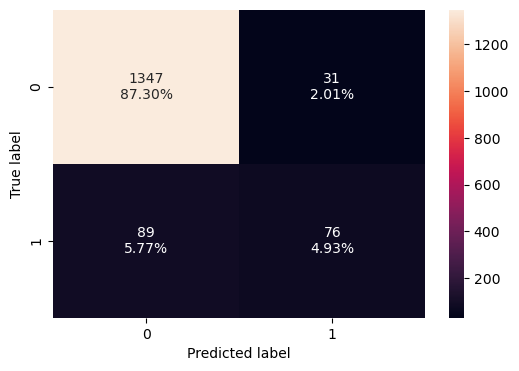

In [40]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [41]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

Accuracy    Recall  Precision        F1
0  0.922229  0.460606    0.71028  0.558824

### Logistic Regression Model - Test Performance

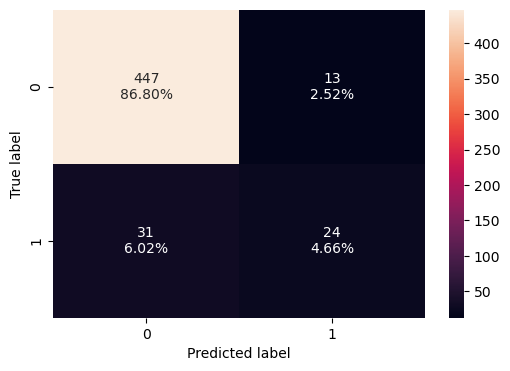

In [42]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to create confusion matrix for test data

In [43]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to check performance on test data
logistic_regression_perf_test

Accuracy    Recall  Precision        F1
0  0.914563  0.436364   0.648649  0.521739

## Random Forest

In [44]:
rf_classifier = RandomForestClassifier(random_state=42)  ## Complete the code to define random forest with random state = 42
rf_model = rf_classifier.fit(X_train, y_train) ## Complete the code to fit random forest on the train data

### Random Forest Model - Training Performance

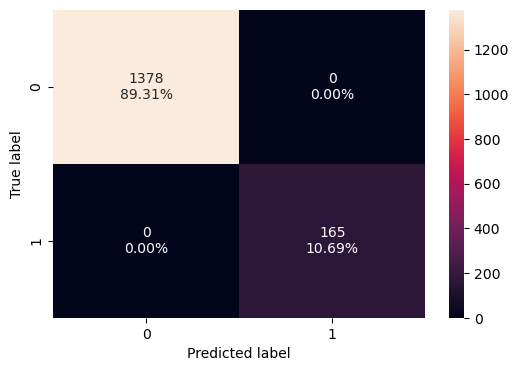

In [45]:
model_confusion_matrix(rf_model, X_train, y_train)

In [46]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

### Random Forest Model - Test Performance

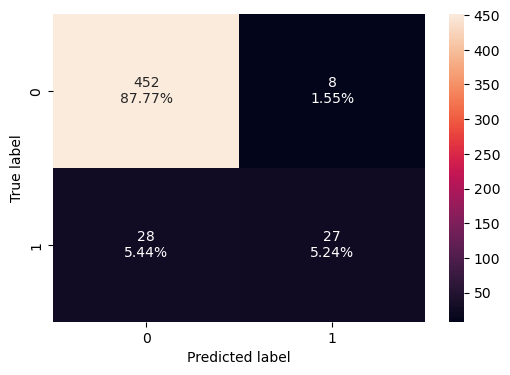

In [47]:
model_confusion_matrix(rf_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [48]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_perf_test

Accuracy    Recall  Precision   F1
0  0.930097  0.490909   0.771429  0.6

# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [49]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [50]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  ## Complete the code to calculate VIF for the scaled X_train data

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


Variable        VIF
0                             Operating_Expense_Rate   1.259611
1              Research_and_development_expense_rate   1.099306
2                                     Cash_flow_rate  12.259184
3                Interest_bearing_debt_interest_rate   1.032597
4                                         Tax_rate_A   1.248346
5                                Cash_Flow_Per_Share   4.564430
6              Per_Share_Net_profit_before_tax_Yuan_   8.756612
7            Realized_Sales_Gross_Profit_Growth_Rate   1.058517
8                       Operating_Profit_Growth_Rate   1.152581
9                  Continuous_Net_Profit_Growth_Rate   1.467948
10                           Total_Asset_Growth_Rate   1.174794
11                             Net_Value_Growth_Rate   1.044367
12              Total_Asset_Return_Growth_Rate_Ratio   1.134845
13                            Cash_Reinvestment_perc   7.340538
14                                     Current_Ratio   4.945713
15                                       Quick_Ratio   1.063685
16                            Interest_Expense_Ratio   1.033551
17                     Total_debt_to_Total_net_worth   3.776391
18                Long_term_fund_suitability_ratio_A   1.839945
19          Net_profit_before_tax_to_Paid_in_capital   8.637685
20                              Total_Asset_Turnover   5.467530
21                      Accounts_Receivable_Turnover   1.064519
22                           Average_Collection_Days   1.060724
23                     Inventory_Turnover_Rate_times   1.100171
24                   Fixed_Assets_Turnover_Frequency   1.223623
25                     Net_Worth_Turnover_Rate_times   3.945259
26                       Operating_profit_per_person   1.568575
27                        Allocation_rate_per_person   1.198618
28                      Quick_Assets_to_Total_Assets   2.397607
29                              Cash_to_Total_Assets   2.183010
30                 Quick_Assets_to_Current_Liability   1.009579
31                         Cash_to_Current_Liability   1.079209
32                      Operating_Funds_to_Liability  12.536226
33                      Inventory_to_Working_Capital   1.459350
34                    Inventory_to_Current_Liability   1.124100
35             Long_term_Liability_to_Current_Assets   1.102010
36                 Retained_Earnings_to_Total_Assets   3.365775
37                     Total_income_to_Total_expense   1.676735
38                           Total_expense_to_Assets   3.366230
39                       Current_Asset_Turnover_Rate   1.416203
40                         Quick_Asset_Turnover_Rate   1.377544
41                                Cash_Turnover_Rate   1.107230
42                            Fixed_Assets_to_Assets   1.815190
43                         Cash_Flow_to_Total_Assets   3.309496
44                            Cash_Flow_to_Liability   2.813638
45                                     CFO_to_Assets  10.987676
46                               Cash_Flow_to_Equity   1.425404
47               Current_Liability_to_Current_Assets   1.464422
48                         Total_assets_to_GNP_price   1.041114
49                                No_credit_Interval   1.032531
50                  Degree_of_Financial_Leverage_DFL   1.015012
51  Interest_Coverage_Ratio_Interest_expense_to_EBIT   1.018535
52                               Equity_to_Liability   4.779776

In [51]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Cash_flow_rate',
 'Per_Share_Net_profit_before_tax_Yuan_',
 'Cash_Reinvestment_perc',
 'Net_profit_before_tax_to_Paid_in_capital',
 'Total_Asset_Turnover',
 'Operating_Funds_to_Liability',
 'CFO_to_Assets']

In [52]:
# Dropping columns with VIF > 5
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [53]:
X_train_scaled.shape

(1543, 46)

In [54]:
X_test_scaled.shape

(515, 46)

In [55]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [82]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved =  SM.Logit(y_train, X_train_new_with_intercept).fit(maxiter=100, method='bfgs', disp=0)  ## Complete the code to fir Logistic Regression Model on new train data with intercept
print(LogisticReg_improved.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1543
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           46
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.4086
Time:                        12:50:00   Log-Likelihood:                -310.30
converged:                      False   LL-Null:                       -524.71
Covariance Type:            nonrobust   LLR p-value:                 1.462e-63
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.4843      0.730     -6.144      0.000      -5.915      -3.054
Operating_Expense

In [83]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.084

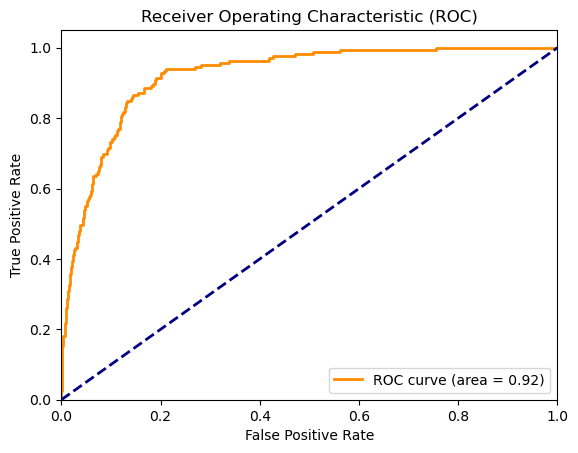

In [84]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  ## Complete the code to get roc_auc score
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

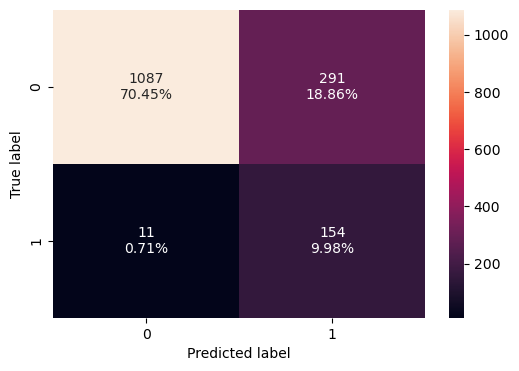

In [85]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [86]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

Accuracy    Recall  Precision        F1
0  0.804277  0.933333   0.346067  0.504918

### Logistic Regression Performance - Test Set

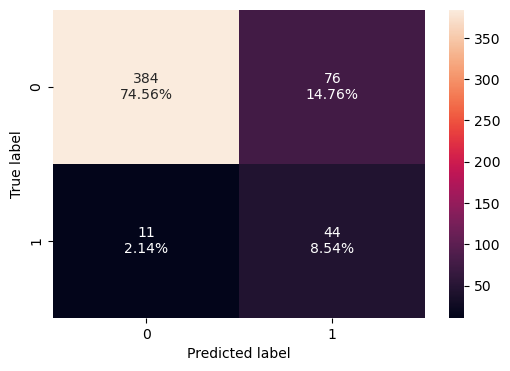

In [87]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to create confusion matrix for test data

In [88]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to check performance on test data
logistic_regression_tuned_perf_test

Accuracy  Recall  Precision        F1
0  0.831068     0.8   0.366667  0.502857

## Model Performance Improvement - Random Forest

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 7, 9],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [90]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [91]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 7
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

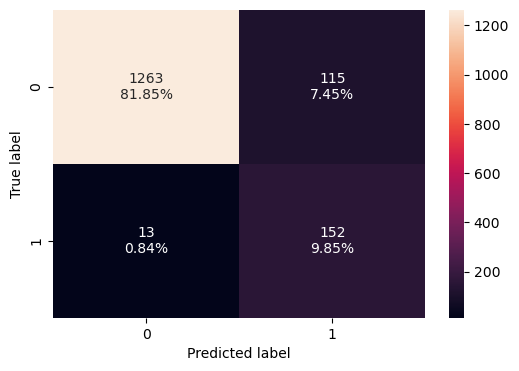

In [92]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)  ## Complete the code to create confusion matrix for training data

In [93]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)  ## Complete the code to check performance on training data
random_forest_tuned_perf_train

Accuracy    Recall  Precision        F1
0  0.917045  0.921212   0.569288  0.703704

### Random Forest Performance - Test Set

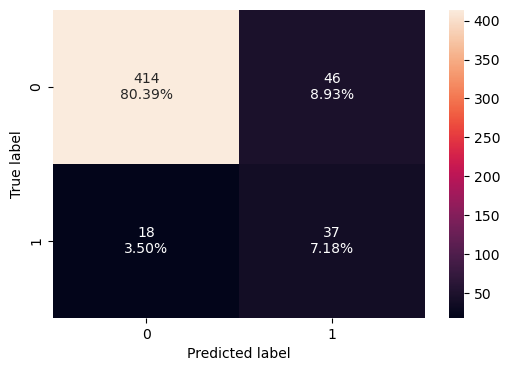

In [94]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [95]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_tuned_perf_test

Accuracy    Recall  Precision        F1
0  0.875728  0.672727   0.445783  0.536232

# Model Comparison and Final Model Selection

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy              0.922229                   0.804277            1.0   
Recall                0.460606                   0.933333            1.0   
Precision             0.710280                   0.346067            1.0   
F1                    0.558824                   0.504918            1.0   

           Tuned Random Forest  
Accuracy              0.917045  
Recall                0.921212  
Precision             0.569288  
F1                    0.703704

In [97]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy              0.914563                   0.831068       0.930097   
Recall                0.436364                   0.800000       0.490909   
Precision             0.648649                   0.366667       0.771429   
F1                    0.521739                   0.502857       0.600000   

           Tuned Random Forest  
Accuracy              0.875728  
Recall                0.672727  
Precision             0.445783  
F1                    0.536232

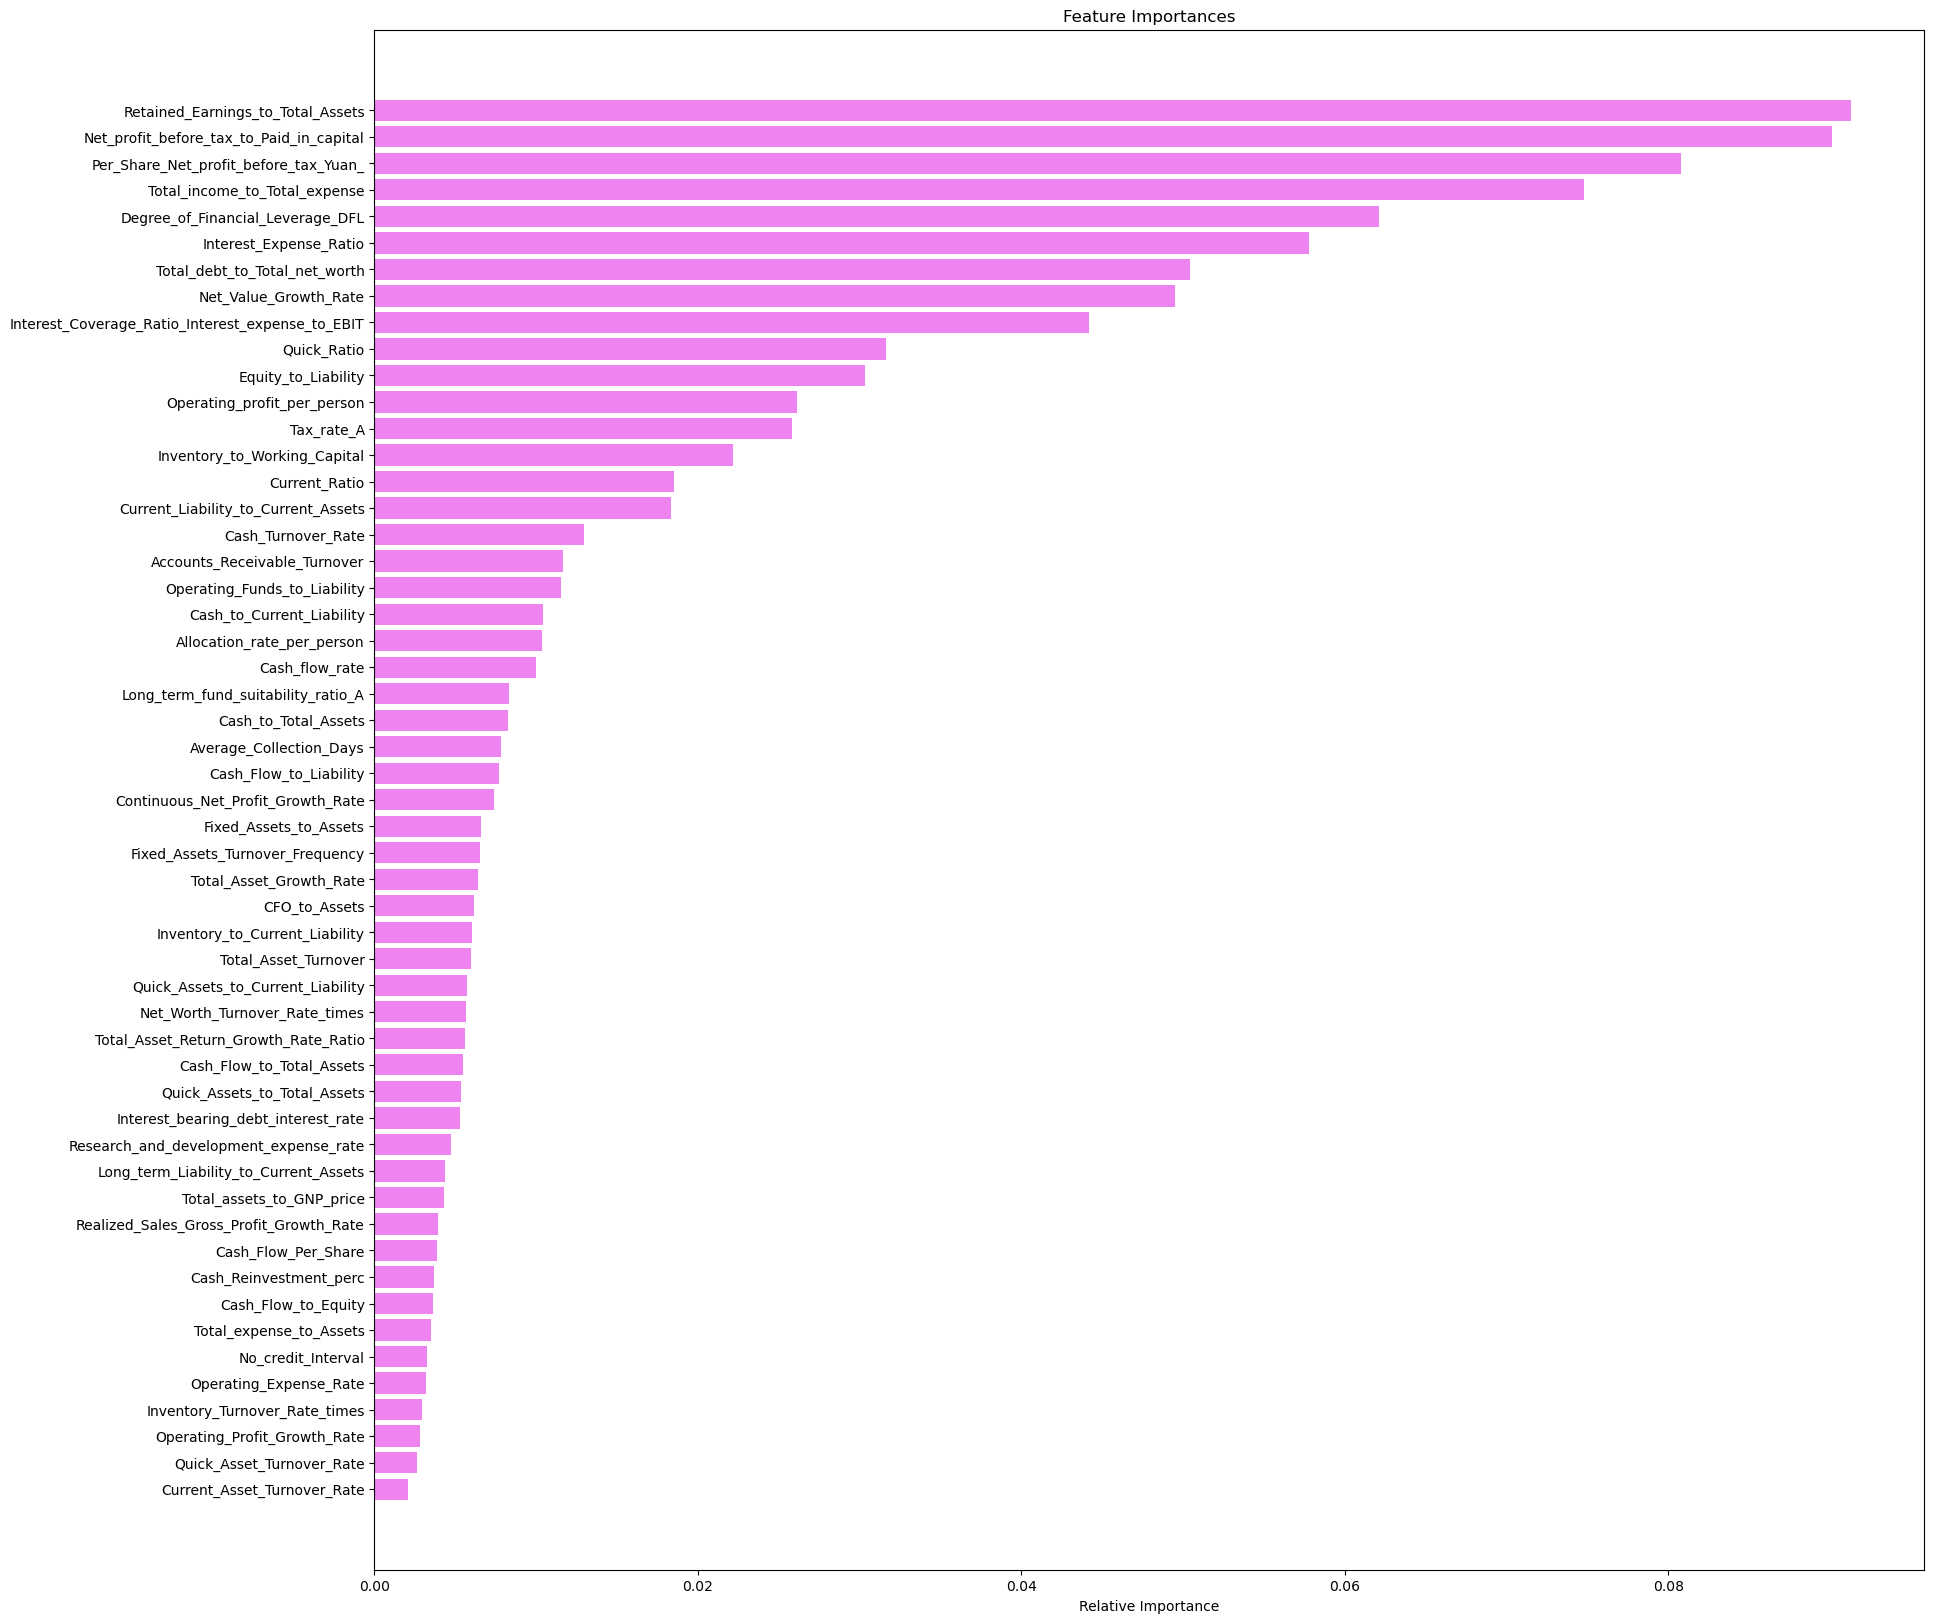

In [98]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations

The chart shows the relative importance of different financial metrics for predicting a company's financial health. The metrics with the highest relative importance are:

Retained Earnings to Total Assets: This metric indicates how much of a company's earnings are being reinvested back into the business. A high value suggests a company is investing in its growth, which is a positive sign.
Net Profit Before Tax to Paid-in Capital: This metric measures a company's profitability relative to the amount of capital invested by shareholders. A high value indicates that the company is efficiently using its capital to generate profits.
Per Share Net Profit Before Tax (Yuan): This metric measures the profitability of the company on a per-share basis. A high value suggests that the company is generating significant profits for its shareholders.
These metrics are important because they provide insights into a company's profitability, growth potential, and financial stability.

Recommendations:

Focus on improving the metrics with the highest relative importance. This means making sure that the company is reinvesting its earnings wisely, using its capital efficiently, and generating strong profits for its shareholders.
Use the chart to identify areas where the company can improve. For example, if the company has a low cash flow to total assets ratio, it might need to focus on improving its cash management practices.
Monitor the performance of the key metrics over time. This will help you track the company's progress and identify any potential problems early on.
By focusing on the most important financial metrics, companies can improve their chances of achieving financial success.